### Feynn Labs Internship 

**Shiva Chidambaram S**




## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sn

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data.csv',index_col= 0 )
X = np.array(dataset[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(dataset[['isFraud']])
print(X)
print(y)

[['PAYMENT' 9839.64 170136.0 160296.36]
 ['PAYMENT' 1864.28 21249.0 19384.72]
 ['TRANSFER' 181.0 181.0 0.0]
 ...
 ['PAYMENT' 14140.05 20545.0 6404.95]
 ['PAYMENT' 10020.05 90605.0 80584.95]
 ['PAYMENT' 11450.03 80584.95 69134.92]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


##Exploring the dataset

In [ ]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
dataset.describe()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.586670e+05,8.740095e+05,8.938089e+05,1.089097e-03
std,2.649409e+05,2.971751e+06,3.008271e+06,3.298351e-02
min,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.634333e+04,1.600200e+04,0.000000e+00,0.000000e+00
75%,2.137619e+05,1.366420e+05,1.746000e+05,0.000000e+00
max,1.000000e+07,3.890000e+07,3.890000e+07,1.000000e+00


In [ ]:
type_transaction = dataset["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

fig = px.pie(dataset,
            values = quantity,
            names = transaction, 
            hole = 0.4,
            title = "Distribution of Transaction Type")
fig.show()

##Checking correlation with features and isFraud

In [ ]:
corr = dataset.corr()
corr["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
oldbalanceOrg     0.003829
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64

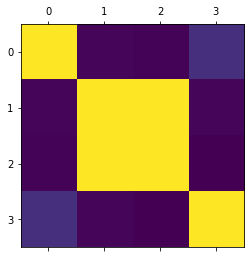

In [ ]:
plt.matshow(dataset.corr())
plt.show()

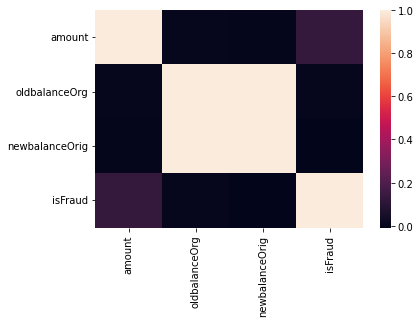

In [ ]:
from seaborn import heatmap
heatmap(dataset.corr())

## One Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 0.0 ... 9839.64 170136.0 160296.36]
 [0.0 0.0 0.0 ... 1864.28 21249.0 19384.72]
 [0.0 0.0 0.0 ... 181.0 181.0 0.0]
 ...
 [0.0 0.0 0.0 ... 14140.05 20545.0 6404.95]
 [0.0 0.0 0.0 ... 10020.05 90605.0 80584.95]
 [0.0 0.0 0.0 ... 11450.03 80584.95 69134.92]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[261792     73]
 [    87    192]]


0.9993896484375